Train RMSE: 3.069932051181708, Train R2: 0.9304682485343462
Test RMSE: 8.364467872013313, Test R2: 0.5295168151910759


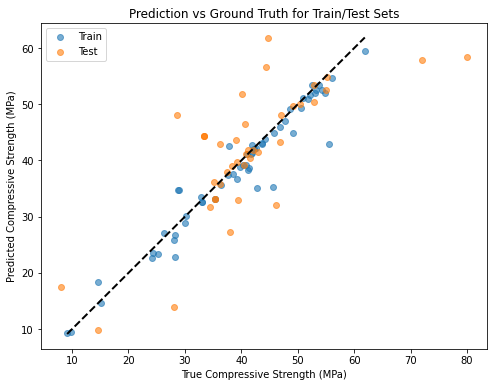

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("Concrete_Data.xls")
data = data.iloc[:100]
feature_set = data.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
#print(feature_set.head())
label_set = data['Concrete compressive strength(MPa, megapascals) ']
#print(label_set.head())

X = feature_set.values
Y = label_set.values

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model():
    model = keras.Sequential([
        layers.Dense(200, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(100, activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
    return model

model = build_model()

history = model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0)

y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel("True Compressive Strength (MPa)")
plt.ylabel("Predicted Compressive Strength (MPa)")
plt.title("Prediction vs Ground Truth for Train/Test Sets")
plt.legend()
plt.show()


Best epoch based on EarlyStopping: 75


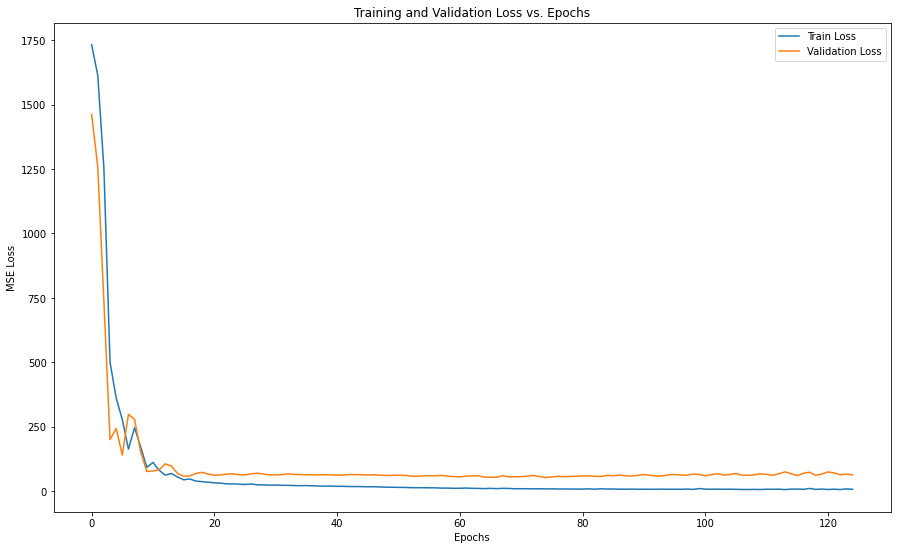

Train MSE: 17.4464538283998, Train R2: 0.8712839189755434
Test MSE: 97.36279138421382, Test R2: 0.3452726425281105


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("Concrete_Data.xls")
data = data.iloc[:100]
X = data.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
Y = data['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model():
    model = keras.Sequential([
        layers.Dense(200, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(100, activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
    return model

model = build_model()

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=0,
                    callbacks=[early_stopping, checkpoint])

best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1
print(f"Best epoch based on EarlyStopping: {best_epoch}")

plt.figure(figsize=(15, 9))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()
plt.show()

best_model = keras.models.load_model("best_model.hdf5")

y_train_pred = best_model.predict(X_train).flatten()
y_test_pred = best_model.predict(X_test).flatten()

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R2: {test_r2}")



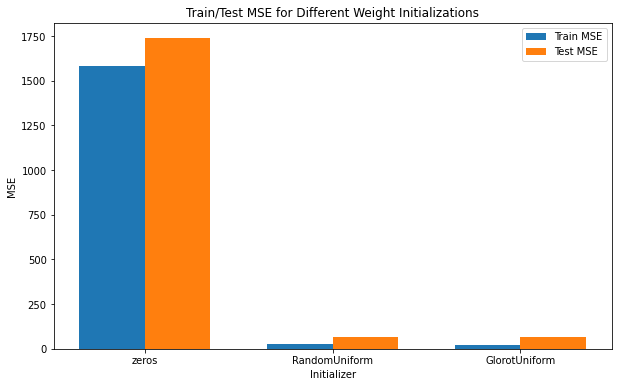

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("Concrete_Data.xls")
data = data.iloc[:100]
X = data.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
Y = data['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model(initializer):
    model = keras.Sequential([
        layers.Dense(200, activation="relu", kernel_initializer=initializer, input_shape=(X_train.shape[1],)),
        layers.Dense(100, activation="relu", kernel_initializer=initializer),
        layers.Dense(50, activation="relu", kernel_initializer=initializer),
        layers.Dense(10, activation="relu", kernel_initializer=initializer),
        layers.Dense(1, kernel_initializer=initializer)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
    return model

initializers = ["zeros", "RandomUniform", "GlorotUniform"]
results = {}

for initializer in initializers:
    model = build_model(initializer)
    history = model.fit(X_train, y_train, epochs=35, batch_size=16, verbose=0)
    
    y_train_pred = model.predict(X_train).flatten()
    y_test_pred = model.predict(X_test).flatten()

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    results[initializer] = {"train_mse": train_mse, "test_mse": test_mse}

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
train_bars = [results[init]["train_mse"] for init in initializers]
test_bars = [results[init]["test_mse"] for init in initializers]

index = np.arange(len(initializers))
ax.bar(index, train_bars, bar_width, label='Train MSE')
ax.bar(index + bar_width, test_bars, bar_width, label='Test MSE')

ax.set_xlabel('Initializer')
ax.set_ylabel('MSE')
ax.set_title('Train/Test MSE for Different Weight Initializations')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(initializers)
ax.legend()

plt.show()

"""
The "zeros" initialization performs the worst because starting all weights 
at zero prevents symmetry breaking; each neuron learns the same thing, rendering
 them redundant and severely limiting the model's ability to learn. Both "RandomUniform"
and "GlorotUniform" break this symmetry by assigning small, random initial weights,
allowing each neuron to learn unique features. While both achieve good performance,
"GlorotUniform" generally has a slight advantage as it scales weights based on 
layer size, helping to maintain gradient stability across layers, which is 
especially beneficial in deeper networks.
"""

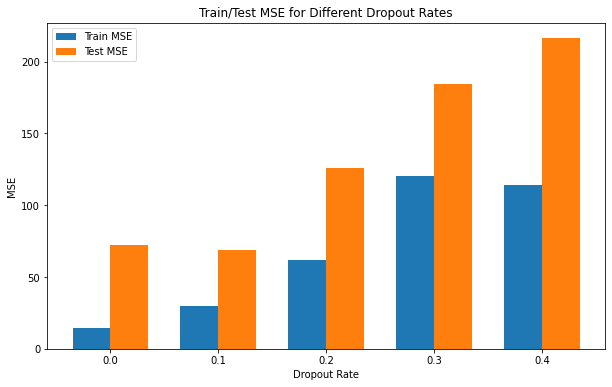

'\nQ: What do you observe about the performance on the training and test sets, respectively, as the dropout rate\nincreases? What is the best dropout rate for your model?\n\nA: As the dropout rate increases, training MSE rises because dropout reduces model capacity, \nmaking it harder to fit the training data. Test performance initially improves at a dropout \nrate of 0.1, as regularization helps reduce overfitting. However, at higher dropout rates \n(0.2 and above), test MSE increases, indicating underfitting due to excessive dropout. The \noptimal dropout rate for this model is 0.1, which provides a good balance between training\n and test performance.\n'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("Concrete_Data.xls")
data = data.iloc[:100]
X = data.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
Y = data['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model(dropout_rate):
    model = keras.Sequential([
        layers.Dense(200, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dropout(dropout_rate),
        layers.Dense(100, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(50, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
    return model

dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4]
results = {}

for rate in dropout_rates:
    model = build_model(rate)
    history = model.fit(X_train, y_train, epochs=35, batch_size=16, verbose=0)
    
    y_train_pred = model.predict(X_train).flatten()
    y_test_pred = model.predict(X_test).flatten()

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    results[rate] = {"train_mse": train_mse, "test_mse": test_mse}

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
train_bars = [results[rate]["train_mse"] for rate in dropout_rates]
test_bars = [results[rate]["test_mse"] for rate in dropout_rates]

index = np.arange(len(dropout_rates))
ax.bar(index, train_bars, bar_width, label='Train MSE')
ax.bar(index + bar_width, test_bars, bar_width, label='Test MSE')

ax.set_xlabel('Dropout Rate')
ax.set_ylabel('MSE')
ax.set_title('Train/Test MSE for Different Dropout Rates')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dropout_rates)
ax.legend()

plt.show()

"""
As the dropout rate increases, training MSE rises because dropout reduces model capacity, 
making it harder to fit the training data. Test performance initially improves at a dropout 
rate of 0.1, as regularization helps reduce overfitting. However, at higher dropout rates 
(0.2 and above), test MSE increases, indicating underfitting due to excessive dropout. The 
optimal dropout rate for this model is 0.1, which provides a good balance between training
 and test performance.
"""


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel("Concrete_Data.xls")
data = data.iloc[:100]
X = data.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
Y = data['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model():
    model = keras.Sequential([
        layers.Dense(200, activation="relu", input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dense(100, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(50, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(10, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
    return model

model = build_model()

history = model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0)

y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R2: {test_r2}")




Train MSE: 6.649518963821782, Train R2: 0.95094131849719
Test MSE: 38.61082860167598, Test R2: 0.7403570150282879
